## K-means with MTCARS

#Tasks to be performed:

1.	Building the k-means clustering algorithm:
a.	Start off by extracting the ‘mpg’, ‘disp’ & ‘hp’ columns from the ‘mtcars’ data.frame. Store the result in ‘car_features’
b.	Build the kmeans algorithm on top of ‘car_features’. Here, the number of clusters should be 3
c.	Bind the clustering vector to ‘car_features’.
d.	Extract observations belonging to individual clusters



2.	On the same ‘car_features’dataset build a k-means algorithm, where the number of clusters is 5
a.	Bind the clustering vector to ‘car_features’
b.	Extract observations belonging to individual clusters


In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
Df = pd.read_csv('D:/Data Science/Python for DS/INTELIPATH/Module_6_To_10_Project_Data_Science_with_Python/Module 9_Unsupervised_Learning/Assignment/mtcars2.csv')

In [6]:
Df.head()

,S.No,Unnamed: 1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,2,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
Df.isnull().head()

,S.No,Unnamed: 1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   S.No        32 non-null     int64  
 1   Unnamed: 1  32 non-null     object 
 2   mpg         32 non-null     float64
 3   cyl         32 non-null     int64  
 4   disp        32 non-null     float64
 5   hp          32 non-null     int64  
 6   drat        32 non-null     float64
 7   wt          32 non-null     float64
 8   qsec        29 non-null     float64
 9   vs          32 non-null     int64  
 10  am          32 non-null     int64  
 11  gear        32 non-null     int64  
 12  carb        32 non-null     int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 3.4+ KB


In [11]:
Df.describe()

,S.No,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,29.000000,32.000000,32.000000,32.000000,32.0000
mean,16.500000,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.674828,0.437500,0.406250,3.687500,2.8125
std,9.380832,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.780394,0.504016,0.498991,0.737804,1.6152
min,1.000000,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,8.750000,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.870000,0.000000,0.000000,3.000000,2.0000
50%,16.500000,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.420000,0.000000,0.000000,4.000000,2.0000
75%,24.250000,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.600000,1.000000,1.000000,4.000000,4.0000
max,32.000000,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [14]:
Df.shape

(32, 13)

In [15]:
import seaborn as sns

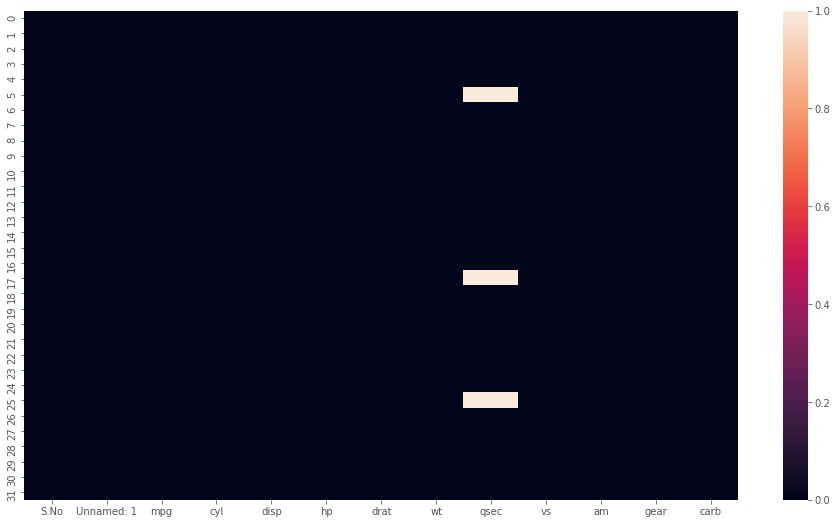

In [16]:
sns.heatmap(Df.isnull())

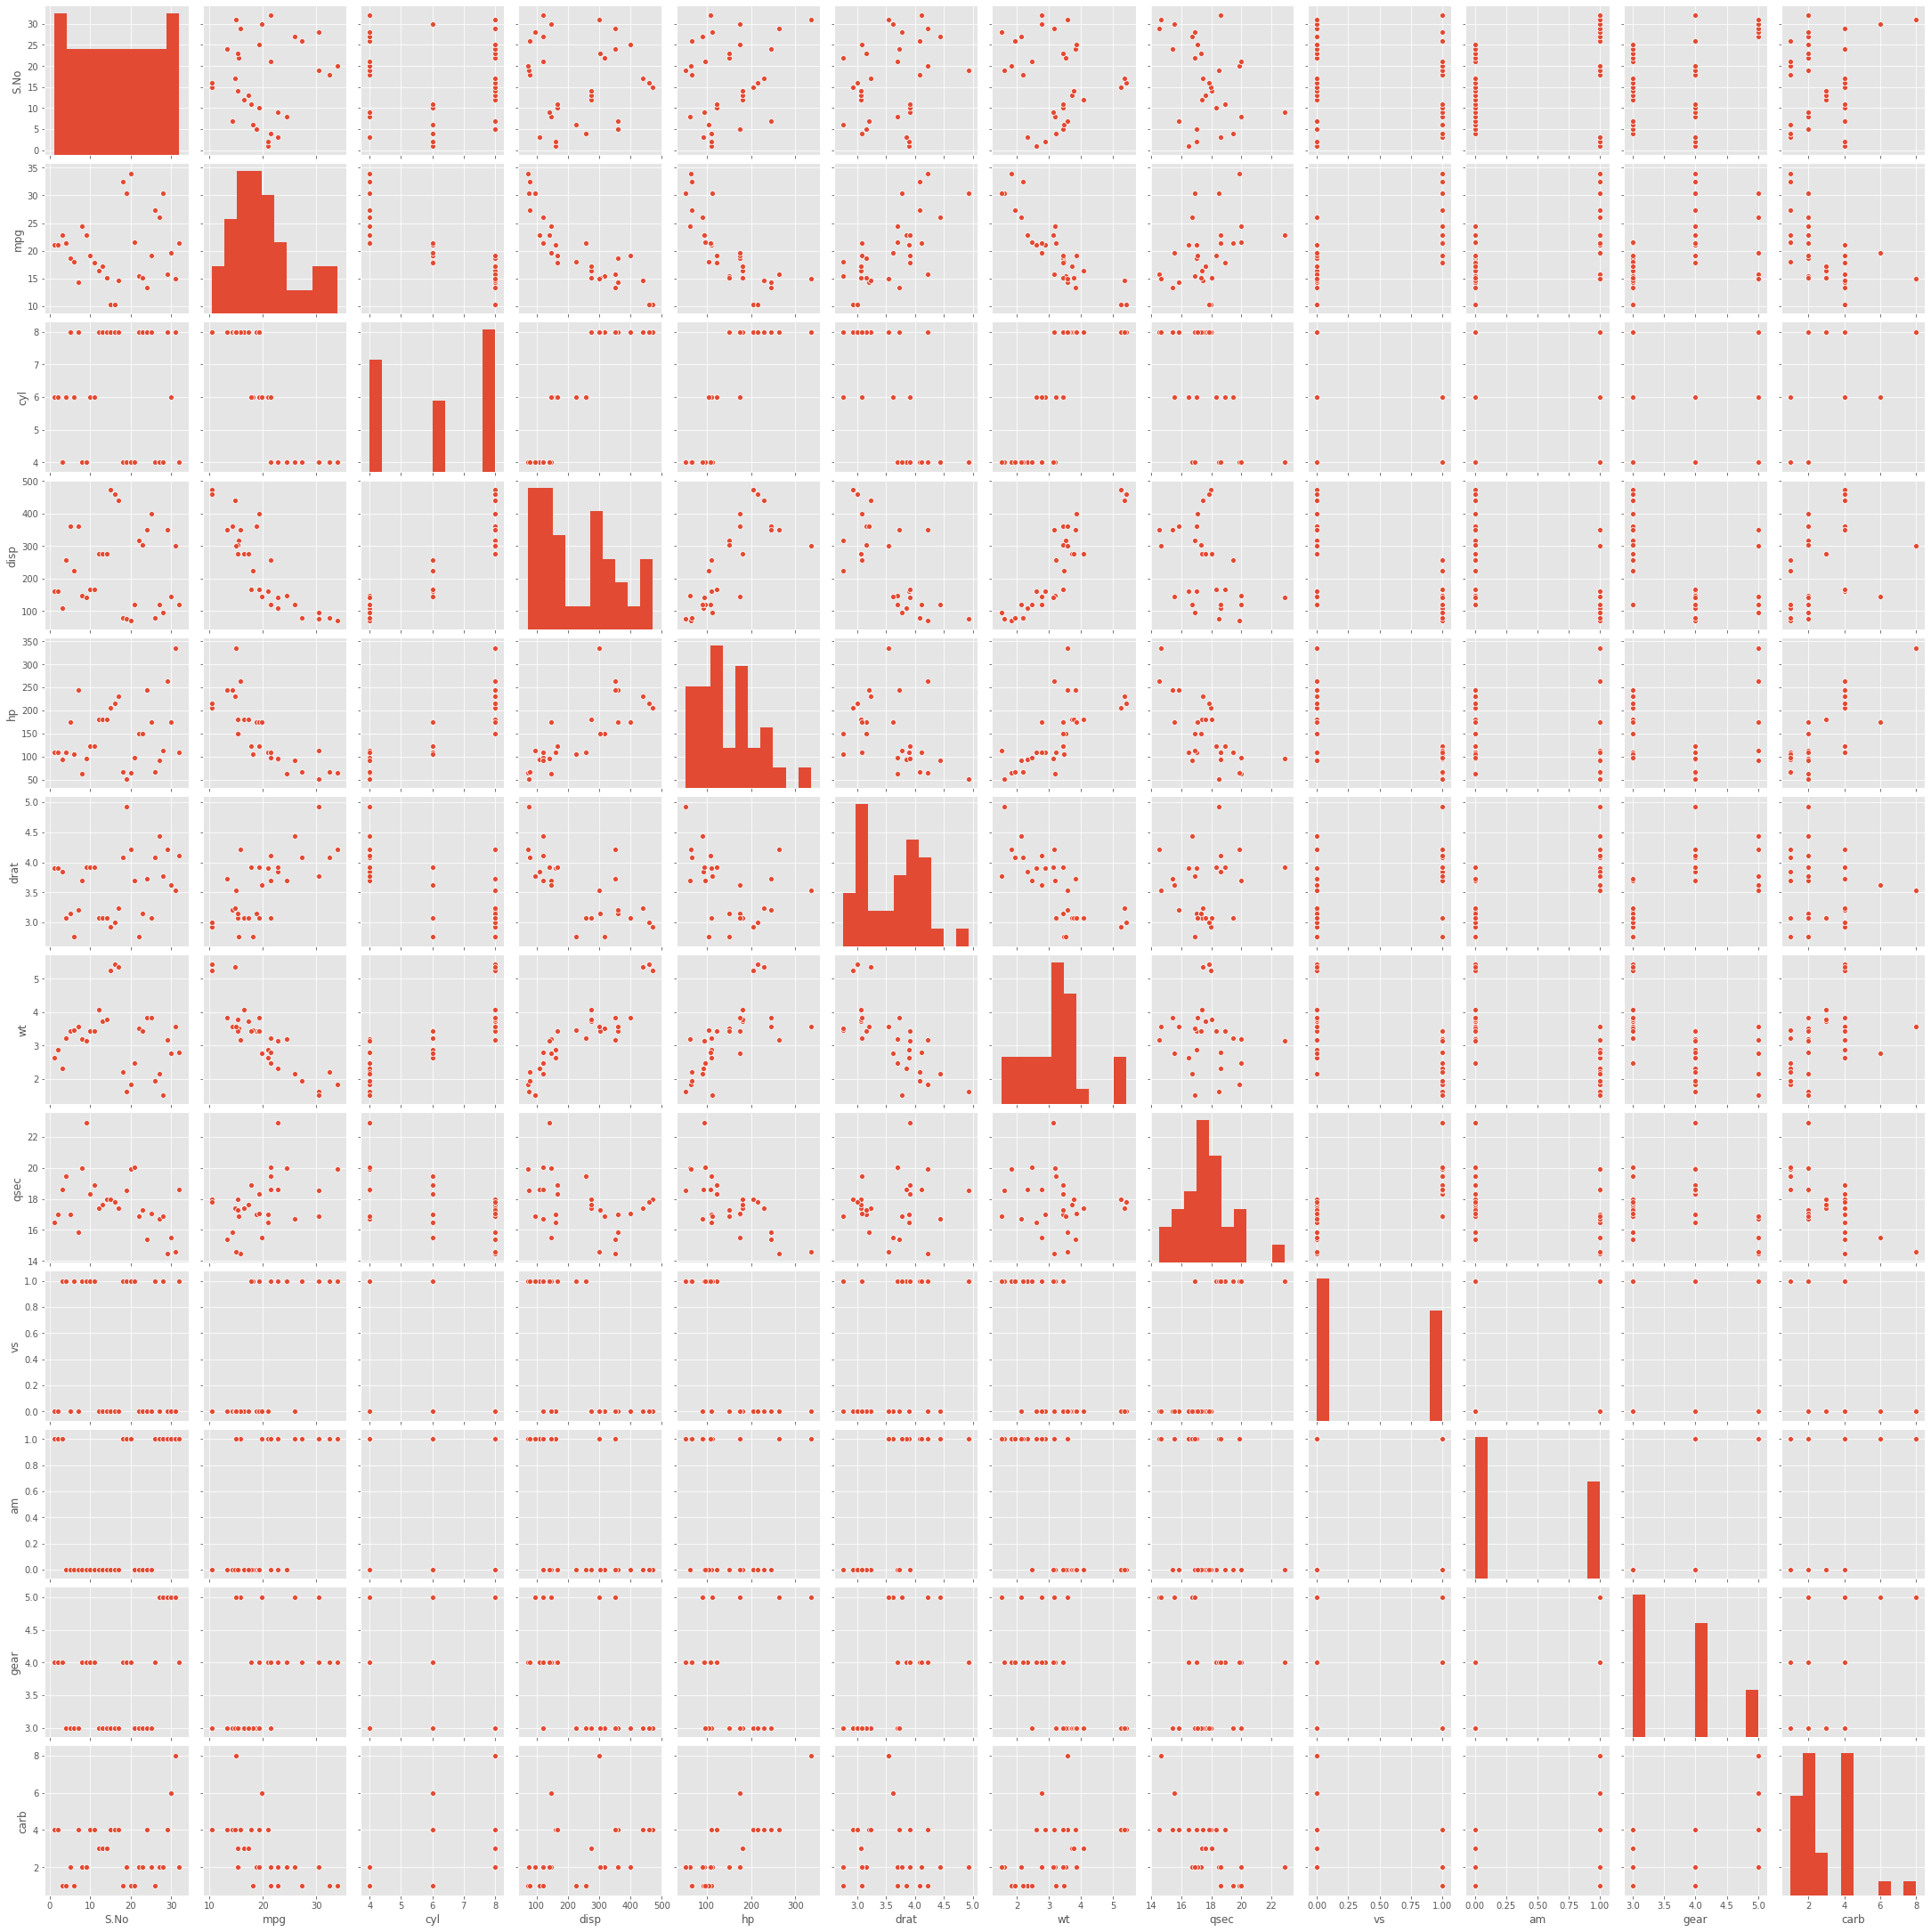

In [17]:
sns.pairplot(Df)

#a.	Start off by extracting the ‘mpg’, ‘disp’ & ‘hp’ columns from the ‘mtcars’ data.frame. Store the result in ‘car_features’

In [19]:
Df.head()

,S.No,Unnamed: 1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,2,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [20]:
x1 = Df['mpg']
x2= Df['disp']
x3 = Df['hp']

car_features = np.array(list(zip(x1,x2,x3)))

b.	Build the kmeans algorithm on top of ‘car_features’. Here, the number of clusters should be 3

In [24]:
from sklearn.cluster import KMeans 

In [39]:
kmean = KMeans(n_clusters=3)

In [40]:
Kmodel = kmean.fit(car_features)

In [41]:
labels = Kmodel.predict(car_features)

In [42]:
centroids = Kmodel.cluster_centers_
# Comparing with scikit-learn centroids
print(Df) # From Scratch
print(centroids) # From sci-kit learn

    S.No           Unnamed: 1   mpg  cyl   disp   hp  drat     wt   qsec  vs  \
0      1            Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   
1      2        Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   
2      3           Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   
3      4       Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   
4      5    Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   
5      6              Valiant  18.1    6  225.0  105  2.76  3.460    NaN   1   
6      7           Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   
7      8            Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   
8      9             Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   
9     10             Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   
10    11            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   
11    12           Merc 450SE  16.4    8

In [43]:
Kmodel.labels_

array([1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1])

Text(0.5, 1.0, 'K-Means figure')

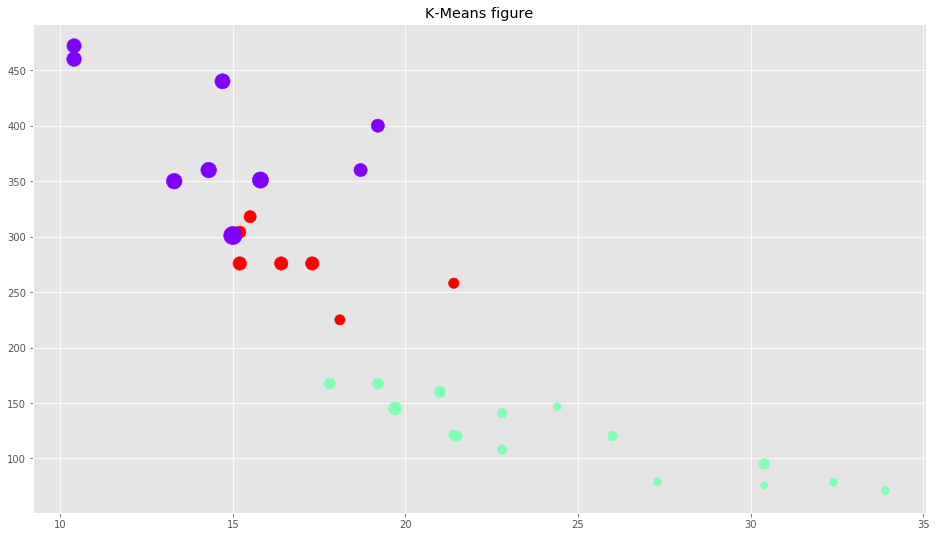

In [44]:
plt.scatter (x1,x2,x3, c = Kmodel.labels_, cmap = 'rainbow' )
plt.title('K-Means figure')

Text(0.5, 1.0, 'Orignal')

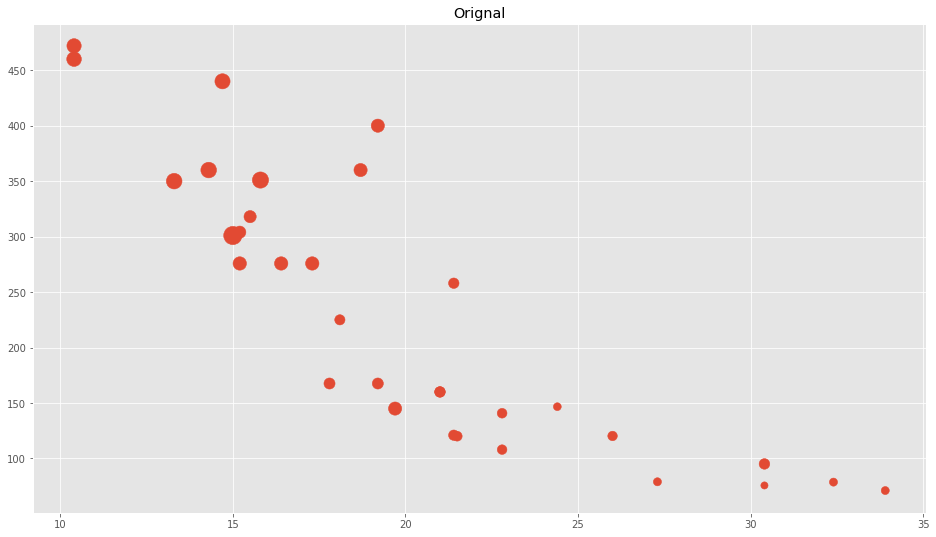

In [38]:
plt.scatter (x1,x2,x3 )
plt.title('Orignal')

2.	On the same ‘car_features’dataset build a k-means algorithm, where the number of clusters is 5
a.	Bind the clustering vector to ‘car_features’
b.	Extract observations belonging to individual clusters


In [51]:
kmean2 = KMeans(n_clusters=5)
Kmodel2 = kmean2.fit(car_features)
labels = Kmodel2.predict(car_features)
Kmodel2.labels_

array([3, 3, 0, 2, 2, 3, 1, 0, 0, 3, 3, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 2,
       2, 1, 4, 0, 0, 0, 1, 3, 1, 0])

Text(0.5, 1.0, 'K-Means figure')

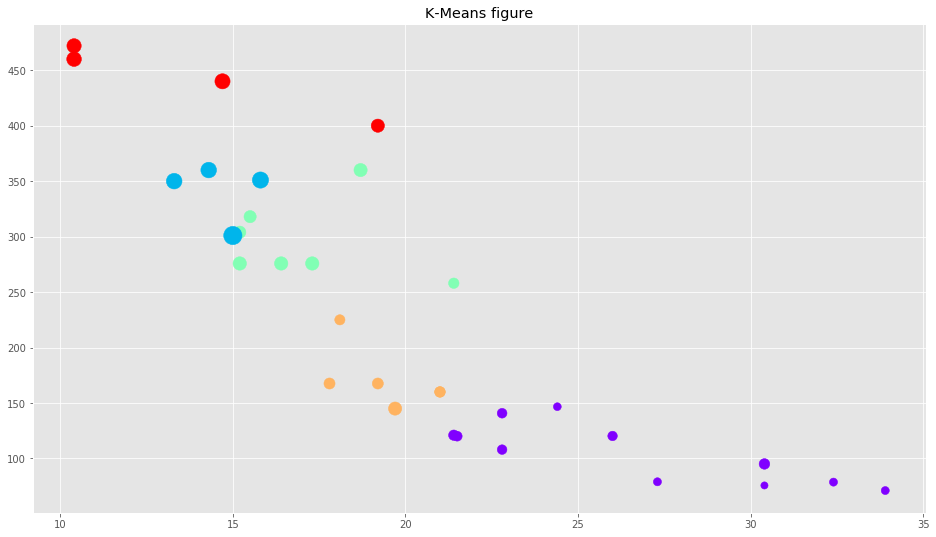

In [52]:
plt.scatter (x1,x2,x3, c = Kmodel2.labels_, cmap = 'rainbow' )
plt.title('K-Means figure')